<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/Interpola%C3%A7%C3%A3oCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aproximação de funções



Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: o Método dos Mínimos Quadrados e a Interpolação polinomial. A seguir, apresentamos alguns exemplos de resolução em Python. Vamos utilizar as bibliotecas numpy e scipy.

**Interpolação Polinomial**

Vamos estudar métodos numéricos que permitem determinar um polinômio que passe por $n+1$ pontos conhecidos, denotados por $(x_0,y_0)$, $(x_1,y_1)$, $\ldots$, $(x_n,y_n)$, com $x_0\neq x_1\neq \ldots \neq x_n$. Em outras palavras, considere a tabela

$$\begin{array}{c|cccc}
x & x_0 & x_1 & \ldots & x_n \\
\hline
f(x) & f(x_0) & f(x_1) & \ldots & f(x_n) \\
\end{array}$$
sendo $f(x_i)=y_i$ para $i=0,1,\ldots, n$. Interpolar $x$ a tabela significa calcular $f(x)$, ou seja, incluir $(x,f(x))$ à tabela. Neste caso, vamos obter um polinômio aproximador $p(x)$ tal que $p(x_i) = y_i$, para $i=0,1,\ldots,n.$


Vamos estudar três formas de se obter um polinômio interpolador:

1.  Resolvendo um sistema linear.
2.  Fórmula de Lagrange.
3.  Forma de Newton.

O próximo resultado garante a existência e unicidade  do polinômio interpolador de uma tabela com $n+1$ pontos dados.

**Proposição:**

Dados $n+1$ pontos $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, com $x_0,x_1,\ldots,x_n$ distintos entre si, existe um único polinômio interpolador $p(x)$ de grau menor ou igual a $n$ que passa por esses pontos, ou seja, $p(x_i)=y_i$, para $i=0,1,\ldots,n$.

*demonstração:*

Seja $p(x)=a_0+a_1x+a_2x^2+\ldots+a_nx^n$ um polinômio de grau menor ou igual a $n$. Queremos determinar $a_0,a_1,\ldots,a_n$ de modo que: $p(x_i)=y_i$. Ou seja,
$$\begin{array}{ccccccccccccc}
p(x_0) & = & a_0 & + & a_1x_0 & + \ldots & + & a_nx_0 = y_0\\
p(x_1) & = & a_0 & + & a_1x_1 & + \ldots & + & a_nx_1 = y_1\\
\vdots \\
p(x_n) & = & a_0 & + & a_1x_n & + \ldots & + & a_nx_n = y_n\\
\end{array}$$

Na notação matricial,

$$\left(\begin{array}{ccccc}
1 & x_0 & x_0^2 & \ldots & x_0^n \\
1 & x_1 & x_1^2 & \ldots & x_1^n \\
\vdots \\
1 & x_n & x_n^2 & \ldots & x_n^n
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right)=\left(\begin{array}{c}
y_0\\
y_1\\
\vdots\\
y_n
\end{array}\right)$$

Para mostrar a existência e unicidade do polinômio interpolador precisamos mostrar que o sistema linear tenha única solução.

Vamos considerar $n=1$ então temos o sistema linear:
$$\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1
\end{array}\right)=\left(\begin{array}{c}
y_0\\
y_1
\end{array}\right)$$

Como $x_0\neq x_1$ a matriz possui linhas linearmente independentes  e portanto o determinante é diferente de zero. Logo, a matriz é inversível e o sistema linear possui única solução. De forma análoga, usando o princípio da indução, verificamos para o caso geral, onde obtemos um sistema $(n+1)\times (n+1)$, já que $x_0\neq x_1\neq \ldots\neq x_n$.

*Exemplo 1:*

Dada a tabela de valores da função $f(x)=e^x$. Aproxime (interpole) $f(x)$ em $x=1.32$.

$$\begin{array}{c|ccc}
x & 1.3 & 1.4 & 1.5 \\
\hline
f(x) & 3.669 & 4.055 & 4.482 \\
\end{array}$$






In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def polin(x, c):
    y = c[0]
    n = len(c)
    for i in range(1,n):
        y += c[i]*x**i
    return y

x = [1.3, 1.4, 1.5]
y = [3.669, 4.055, 4.482]
n = len(x)
A = np.zeros((n,n))

for j in range (n):
   for i in range (n):
      A[i][j] = x[i]**j

c = np.linalg.solve(A, y)

xi = 1.32
yi = polin(xi, c)

print(yi - np.exp(1.32))

-0.0005013772608633005


2. **Forma de Lagrange:**

Seja $f$ uma função tabelada em $n+1$ pontos distintos $x_0,x_1,\ldots,x_n$ e sejam os polinômios de grau $n$:

$$L^n_i(x) = \dfrac{(x-x_0)(x-x_1)\ldots(x-x_{i-1})(x-x_{i+1})\ldots(x-x_n)}{(x_i-x_0)(x_i-x_1)\ldots(x_i-x_{i-1})(x_i-x_{i+1})\ldots(x-x_n)} = \prod_{j=0,j\neq i}^n\dfrac{x -x_j}{x_i-x_j},$$

denominados polinômios de Lagrange.

Note que, $L^n_i(x_i) = 1$ e $L^n_i(x_j)=0$ para $i\neq j$.

O polinômio interpolador de $f$ em relação aos pontos $(x_i,y_i)$ é dado por,

$$p(x)=L_0^n(x)f(x_0) + L_1^n(x)f(x_1) + \ldots + L_n^n(x)f(x_n)=\sum_{j=0}^n f(x_j)L_j^n(x)$$

A verificação que $p(x)$ é o polinômio interpolador segue diretamente da substituição dos pontos de interpolação. Por exemplo,

$$p(x_0) = f(x_0)L_0^n(x_0) + L_1^n(x)f(x_1) + \ldots + L_n^n(x)f(x_n) = f(x_0),$$
pois $L_0^n(x_0) = 1$ e $L_j^n(x_0)=0$, com $j=1,\ldots, n$.

Retornando ao exemplo (1):

Aproximar $f(x)=e^x$ em $x=1.32$, dados

$$\begin{array}{c|ccc}
x & 1.3 & 1.4 & 1.5 \\
\hline
f(x) & 3.669 & 4.055 & 4.482 \\
\end{array}$$

Utilizando os polinômios de Lagrange, temos:

$$\begin{array}{l}
L_0^2(x) = \dfrac{(x-1.4)(x-1.5)}{(1.3-1.4)(1.3-1.5)} = \dfrac{x^2-2.9x+2.1}{0.02}\\
L_1^2(x) = \dfrac{(x-1.3)(x-1.5)}{(1.4-1.3)(1.4-1.5)} = \dfrac{-x^2+2.8x-1.95}{0.01}\\
L_2^2(x) = \dfrac{(x-1.3)(x-1.4)}{(1.5-1.3)(1.5-1.4)} = \dfrac{x^2-2.7x+1.82}{0.02}\\
\end{array}$$

Portanto,
$$p(x) = 3.669L_0^2(x) + 4.055L_1^2(x) + 4.482L_2^2(x)$$

Assim, $p(1.32) = 3.669\times 0.72 + 4.055\times 0.36 + 4.482\times (-0.08) = 3.74292.$

**Exercício:**

Determine o polinômio que interpola $f(x)=1/x^2$ nos pontos $x_0=2$, $x_1=2.5$ e $x_2=4$. Avalie $f(3)$ e calcule o erro cometido.

**Teorema:**

Seja $[a,b]$ um intervalo que contém os pontos $x_, x_1,\ldots, x_n, (x_i\neq x_j)$ e $f(x)$ uma função com $n+1$ derivadas contínuas em $[a,b]$. O erro do polinômio interpolador de $f$ avaliado em $x\in [a,b]$ é dado por

$$E(x) = f(x) - p(x)  = \dfrac{f^{(n+1)}(\alpha)}{(n+1)!}{[(x-x_0)(x-x_1)\ldots(x-x_n)]},$$
com $\alpha\in[a,b]$. Apesar de $\alpha$ não ser determinado, a expressão acima é importante para que possamos fazer uma estimativa do erro cometido. Podemos limitar a derivada de ordem $n+1$ em $[a,b]$ por

$$|f^{(n+1)}(\alpha)|\le M = \max_{x\in[a,b]}|f^{(n+1)}(x)|,$$
e assim, obtemos:

$$|f(x) - p(x)|  = \dfrac{M}{(n+1)!}{|(x-x_0)(x-x_1)\ldots(x-x_n)|}.$$

A estimativa de erro, para o exercício anterior, onde $n+1=3$ e $f(x)=1/x^2$ é dada por:

$$|f(3)-p(3)|\le |(3-2)(3-2.5)(3-4)|\dfrac{0.75}{3!} = 0.0625,$$

pois $M = |f^{(3)}(2)| = 0.75$ e $f^{(3)} =-\dfrac{24}{x^5}.$



Exemplo 2:

Dada a tabela de valores
$$\begin{array}{c|ccccccc}
x & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8\\
\hline
f(x) & 0.5 & 0.6 & 0.9 & 0.8 & 1.2 & 1.5 & 1.7 & 2\\
\end{array}$$

Obtenha o polinômio que interpola os dados da tabela.

[ 1.84000000e+01 -4.34757143e+01  3.98180556e+01 -1.82634722e+01
  4.63263889e+00 -6.59305556e-01  4.93055556e-02 -1.50793651e-03]


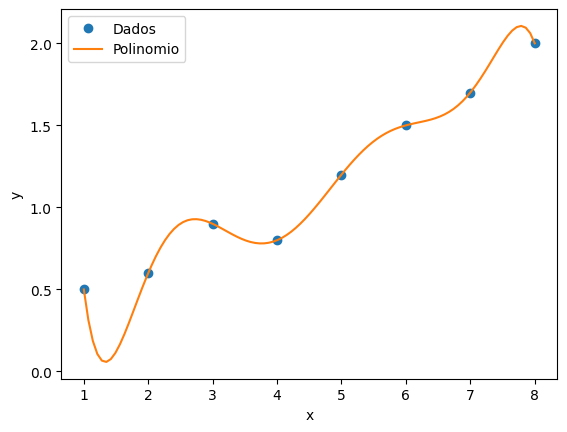

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def polin(x, c):
    y = c[0]
    n = len(c)
    for i in range(1,n):
        y += c[i]*x**i
    return y

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0.5, 0.6, 0.9, 0.8, 1.2, 1.5, 1.7, 2]
n = len(x)
A = np.zeros((n,n))

for j in range (n):
   for i in range (n):
      A[i][j] = x[i]**j

c = np.linalg.solve(A, y)
print(c)
xx = np.linspace(1,8,101)
yy = polin(xx, c)

plt.figure(1)
plt.plot(x, y, 'o', label='Dados')
plt.plot(xx, yy, label='Polinomio')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Forma de Newton**

A forma de Newton utiliza uma fórmula de recorrência, ou seja, o polinômio de grau $n$ pode ser calculado a partir do polinômio de grau $n-1$. Vamos escrever o polinômio interpolador na forma:

$$
p_n(x) = c_0 + c_1(x - x_0) + c_2(x-x_0)(x-x_1) + \ldots + c_n(x-x_0)(x - x_1)\ldots(x-x_{n-1})
$$

As constantes $c_0,c_1,\ldots,c_n$ serão determinadas pelas condições de interpolação $p_n(x_i) = f(x_i)$, com $i=0,1,\ldots,n$. Fazendo $x = x_0$,  obtemos:

$$c_0 = f(x_0)$$

Para determinar $c_1$, usaremos $c_0=f(x_0)$ e reorganizamos a expressão acima, obtemos:

$$\dfrac{p_n(x) - f(x_0)}{x - x_0} = c_1 + c_2(x - x_1) + \ldots + c_n(x-x_1)\ldots(x - x_{n-1}).$$

Fazendo $x = x_1$, obtemos:

$$c_1 = \dfrac{f(x_1) - f(x_0)}{x_1-x_0}.$$

A ideia é continuar este processo para obter os demais coeficientes: $c_2,c_3\ldots,c_n$.

$\bullet$ Definição de Diferenças Divididas:

Seja $f[x_0] = f(x_0)$ e por recorrência definimos para qualquer $k$,
$f[x_0,x_1,x_k] = \dfrac{f[x_1,\ldots,x_k] - f[x_0,\ldots,x_{k-1}]}{x_k - x_0}$

Por exemplo,

$f[x_0] = f(x_0), f[x_0,x_1] = \dfrac{f(x_1)-f(x_0)}{x_1-x_0}$, $f[x_0,x_1,x_2]=\dfrac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}$


$$c_k = f[x_0,x_1,\ldots,x_k]$$

Assim, o polinômio interpolador na forma de Newton é dado por:

$$p_n(x) = f[x_0] + f[x_0,x_1](x - x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1) + \ldots + f[x_0,x_1,\ldots,x_n](x-x_0)(x-x_1)\ldots(x-x_{n-1})$$

**Algoritmo - Tabela de Diferenças Divididas**



1.   Dados $x_i$ e $f(x_i)$,  $n+1$ pontos.
2.   Para $i=0:n$
3.   $\hspace{1pc}$  $d_{i0}=f(x_i)$
4.   Para $k = 1:n$
5.   $\hspace{1pc}$ Para $i=0:n-k$
6.   $\hspace{2pc} d_{ik}=\dfrac{d_{i+1,k-1}-d_{i,k-1}}{x_{i+k}-x_i}$


O polinômio é dado por

$$p(x) = f[x_0]+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)+\ldots+f[x_0,x_1,\ldots,x_{n-1},x_n](x-x_0)(x-x_1)\ldots(x-x_{n-1}),$$

onde $f[x_0]=f(x_0)$ e para qualquer $k$, $$f[x_0,x_1,\ldots,x_k,x]=\dfrac{f[x_0,x_1,\ldots,x_{k-1},x]-f[x_0,x_1,\ldots,x_k]}{x-x_k}$$





**Exemplo (Fenômeno de Runge)**

Seja
$f(x)=\dfrac{1}{1+x^2},x\in(−4,4)$

Para $n$ inteiro, $p_n(x)$ é o polinômio interpolador de $f(x)$ nos pontos igualmente espaçados $x_0,x_1,\ldots,x_n$, dados por $x_i=−4+i⋅h$ e $h=8/n$. Note que aumentarmos o número de pontos o erro aumenta.


[ 0.05882353  0.07058824  0.08235294 -0.04705882  0.01176471]


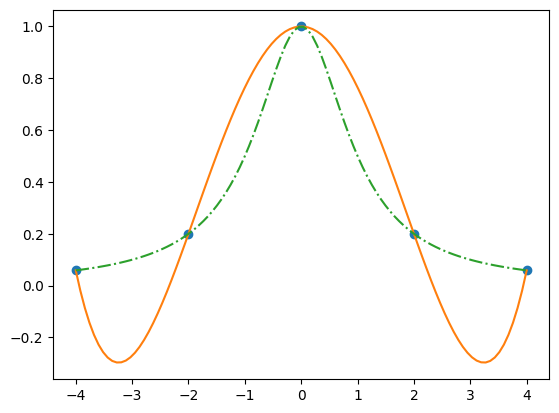

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return(1/(1+x**2))

def dif_div(x,y):
  n = len(x)
  d = np.zeros((n,n))
  c = np.zeros(n)

  for i in range(n):
    d[i,0] = y[i]
  for k in range(1,n):
    for i in range(n-k):
      d[i,k] = (d[i+1,k-1] - d[i,k-1])/(x[i+k] - x[i])

  for i in range(n):
    c[i] = d[0,i]

  return(c)

def p(x0, x, c):
  n = len(c)
  vp = np.zeros(n)
  vp[0] = c[0]
  ss = 1
  px0 = 0
  for i in range(1,n):
    ss *= (x0 - x[i-1])
    vp[i] = c[i]*ss
  for i in range(n):
    px0 += vp[i]
  return px0

N = 5
a = -4
b = 4
h = (b-a)/(N-1)
x = np.arange(a, b+h, h)
y = f(x)

c = dif_div(x, y)
print(c)

x_pol = np.linspace(a, b, 100)
y_pol = np.zeros(len(x_pol))
f_pol = np.zeros(len(x_pol))
for i in range(len(x_pol)):
  y_pol[i] = p(x_pol[i], x, c)
  f_pol[i] = f(x_pol[i])
#print(x_pol)
#print(y_pol)

plt.figure(1)
plt.plot(x, y, 'o')
plt.plot(x_pol, y_pol)
plt.plot(x_pol, f_pol, '-.')
plt.show()

[ 0.5         0.1         0.1        -0.1         0.0625     -0.025
  0.00708333 -0.00150794]


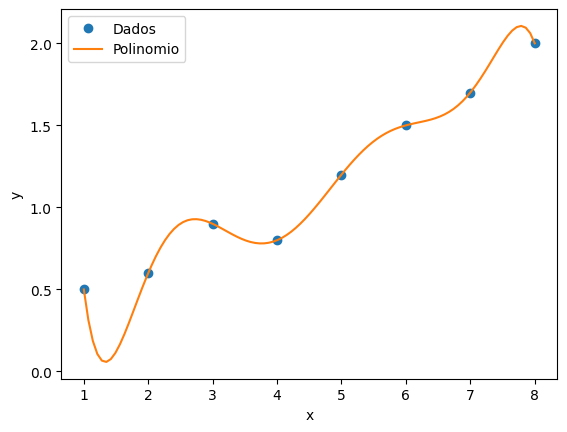

In [ ]:
# Exemplo anterior com diferenças divididas

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0.5, 0.6, 0.9, 0.8, 1.2, 1.5, 1.7, 2]

c = dif_div(x, y)
print(c)
xx = np.linspace(1,8,101)
y_pol = np.zeros(len(xx))
for i in range(len(xx)):
  y_pol[i] = p(xx[i], x, c)

plt.figure(1)
plt.plot(x, y, 'o', label='Dados')
plt.plot(xx, y_pol, label='Polinomio')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Interpolação por linear partes**

Uma alternativa eficiente que consiste em dividir o intervalo em subintervalos e construir polinômios interpoladores em cada subintervalo. Na interpolação linear por partes em cada subintervalo temos uma reta. A desvantagem é que a função aproximadora não é derivável.

Interpolação linear por partes da função $$f(x)=\dfrac{1}{1+x^2}, x\in(-4,4)$$
em $n+1$ pontos igualmente espaçados, $x_0,x_1,\ldots,x_n$, dados por $x_i=-4 + i\cdot h$ e $h = 8/n$.


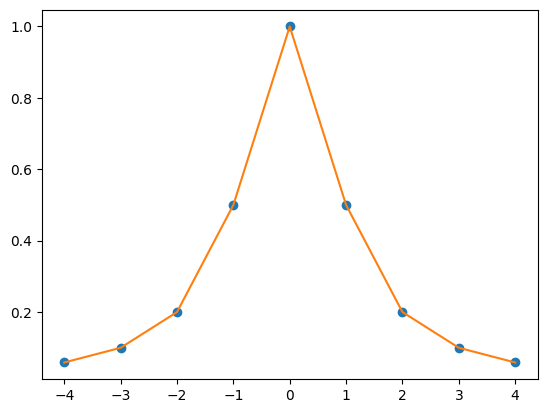

In [ ]:
import matplotlib.pyplot as plt

from scipy import interpolate

#xx = np.arange(-5,5,0.1)
#m = len(xx)
#yy = np.zeros(m)
#yy = f(xx)
a = -4
b = 5
x = np.arange(a, b)
n = len(x)
y = np.zeros(n)
y = f(x)

p = interpolate.interp1d(x, y)

xnew = np.arange(a, b)

ynew = p(xnew)

plt.plot(x, y, 'o', xnew, ynew, '-')


plt.show()

**Splines**

Uma propriedade importante dos polinômios é que conseguimos calcular integrais e derivadas facilmente. Entretanto na interpolação linear por partes perdemos esta propriedade. A técnica de interpolação via splines consiste em interpolar cada subintervalo e obter junções  entre os interpoladores da forma mais suave possível.

As funções *spline*  estão associadas a uma partição de um intervalo $[a,b]$. Uma partição $P$ será definida pelos pontos : $x_0, x_1,\ldots,x_n$, tais que $P:a=x_0 < x_1 < \ldots < x_n=b$. Em cada  subintervalo $(x_{i-1},x_i), i=1,2,\ldots,n$ os splines são polinômios. Para que consigamos as junções mais suaves precisamos impor algumas restrições.

*Definição:*  Uma função $s(x)$ é chamada spline de grau $n$, associada a uma partição $P$ de $[a,b]$ se:

> (i) $s(x)$ é um polinômio de grau $n$ em cada subintervalo $(x_{i-1},x_i)$ .


> (ii) $s(x)$ tem $(n-1)$ derivadas contínuas em cada $x_i$, isto é, $s(x)$ é uma função com $n-1$ derivadas em $(a,b)$.

O termo *spline* se refere a um instrumento de desenho, uma régua flexível que fixada em alguns pontos se encurvava na posição de mínima energia. Pode-se mostrar que essa curvatura de mínima energia é um spline cúbico.

*O conjunto dos splines de grau n, associado a uma partição forma um espaço vetorial.*

**Bases:**

Se $\{\phi_i(x)\}|_{i=1}^k$ é uma base para o espaço vetorial de splines então qualquer elemento deste espaço pode ser escrito na forma:

$$s(x)=c_1\phi_1(x)+c_2\phi_2(x)+\ldots+c_k\phi_k(x),$$

onde $c_1,c_2,\ldots,c_k$ são os coeficientes da combinação linear e $k$ e a dimensão do espaço vetorial.

A base para os splines lineares é dada por:

$$l_i(x)=\left\{\begin{array}{cc}
\dfrac{x-x_{i-1}}{x_i-x_{i-1}}, & \mbox{ se } x_{i-1}\le x \le x_i\\ \\
\dfrac{x_{i+1}-x}{x_{i+1}-x_{i}}, & \mbox{ se } x_{i}\le x \le x_{i+1}\\ \\
0, & \mbox{ se } x > x_{i+1} \mbox{ ou } x < x_{i-1}
\end{array}\right .$$

Na interpolação por partes da função $f(x)$ nos pontos $x_i, i=0,1,2,\ldots,n$, de uma partição $P$, queremos determinar os coeficientes $a_i$ tais que

$$s_1(x) = \sum_{i=0}^na_il_i(x) \mbox{ e } s_1(x_j) = f(x_j)=y_j, \mbox{ com } j=0,1,\ldots, n.$$

Temos que $l_i(x_j) = 0$ se $i\ne j$ e $l_i(x_i)=1$. Portanto, $$s_1(x) = \sum_{i=0}^ny_il_i(x).$$

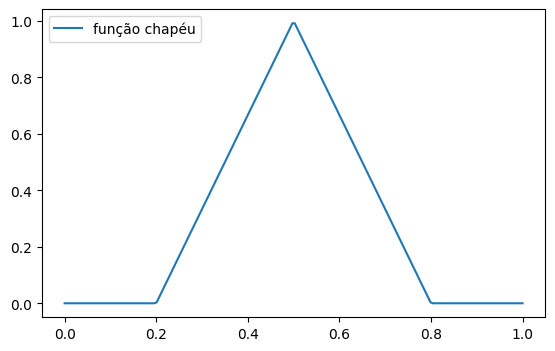

In [ ]:
# função base spline linear

def l(x, a, b, c):
    y = 0
    if x > a and x <= b:
        y = (x - a)/(b - a)
    if x > b and x < c:
        y = (c - x)/(c - b)
    return y

a = 0.2
b = 0.5
c = 0.8
x = np.linspace(0,1,200)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = l(x[i],a,b,c)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, '-', label ='função chapéu')
ax.legend(loc='upper left', ncol=2)
plt.show()

**Spline Cúbico**

A base é composta de funções $B_i(x)$ (sinos) com vértice em $x_i$. Em uma partição igualmente espaçada, ou seja, $h=x_i-x_{i-1}$ para todo $i=1,2,\ldots,n$, temos

$$B_i(x)=\dfrac{1}{h^3}\left\{\begin{array}{ll}
(x-x_{i-2})^3, & \mbox{ se } x_{i-2}\le x \le x_{i-1} \\
h^3+3h^2(x-x_{i-1})+3h(x-x_{i-1})^2-3(x-x_{i-1})^3, & \mbox{ se } x_{i-1}\le x \le x_{i}\\
h^3+3h^2(x_{i+1}-x)+3h(x_{i+1}-x)^2-3(x_{i+1}-x)^3, & \mbox{ se } x_i\le x \le x_{i+1}\\
(x_{i+2}-x)^3, &\mbox{ se } x_{i+1}\le x \le x_{i+2} \\
0, & \mbox{ se } x > x_{i+2} \mbox{ ou } x < x_{i-2}
\end{array}\right .$$
No caso da interpolação por splines cúbicos, queremos determinar os coeficientes $a_i$ tais que:

$$s_3(x) = \sum_{i=-1}^{n+1} a_iB_i(x) \mbox{ e } s_3(x_j)=y_j, j=0,1,\ldots,n,$$
onde $B_i$ é a base de splines cúbicos.

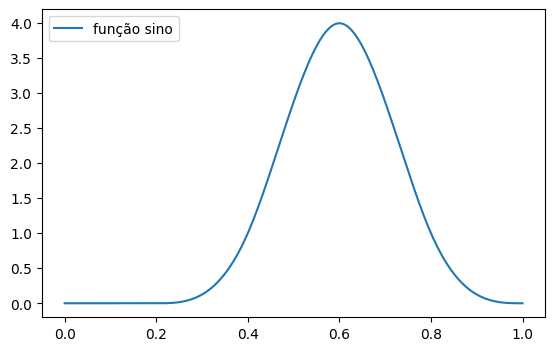

In [ ]:
# função base spline cúbica

def B(x, a):
    y = 0
    h = a[1]-a[0]
    if x > a[0] and x < a[1]:
        y = (x - a[0])**3
    if x > a[1] and x < a[2]:
        y = h**3+3*h**2*(x-a[1])+3*h*(x-a[1])**2-3*(x-a[1])**3
    if x > a[2] and x < a[3]:
        y = h**3+3*h**2*(a[3]-x)+3*h*(a[3]-x)**2-3*(a[3]-x)**3
    if x > a[3] and x < a[4]:
        y = (a[4]-x)**3
    return (1/h**3)*y

a = [0.2, 0.4, 0.6, 0.8, 1]
x = np.linspace(0,1,200)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = B(x[i],a)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, '-', label ='função sino')
ax.legend(loc='upper left', ncol=2)
plt.show()

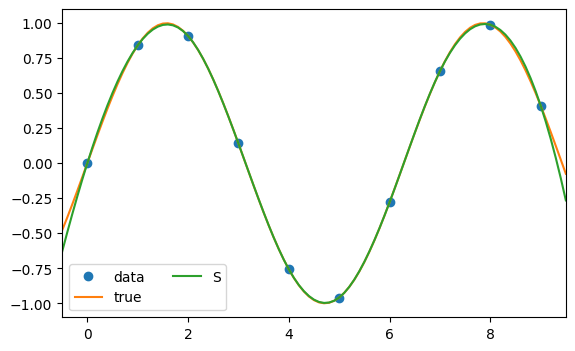

In [ ]:
#Exemplo usando spline cúbico da biblioteca scipy
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)

xs = np.arange(-0.5, 9.6, 0.1)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()